In [1]:
import sys
import requests
from time import sleep
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt

# Requête 

In [2]:
# Variable initialisation
N_request = 40
category = ['tiny','small','medium','large']
listCourse = []
listMissTop = []

In [3]:
def request(category, cpt, listMissTop, oldTop=None) :
    r = requests.get('http://tortues.ecoquery.os.univ-lyon1.fr:8080/'+str(category))
    r_json = r.json()
    recs = r_json['tortoises']
    df = pd.json_normalize(recs)
    if cpt == 0 :
        oldTop = df.top[0]
    if cpt != 0 :
        #print("old top : "+str(oldTop) + " et new top: "+str(df.top[0]))
        if df.top[0] != (oldTop + 1) :
            print("Rattage de top ! ")
            listMissTop.append(cpt+1)
        oldTop = df.top[0]
    df['iterration_update'] = cpt
    return df,oldTop

In [4]:
oldTop = None
repeat = True
cpt=0    
while cpt < N_request :
    print('Requete '+str(cpt+1))
    res = request('tiny',cpt,listMissTop,oldTop)
    listCourse.append(res[0])
    oldTop = res[1]
    #repeat = res[2]
    sleep(2.99)
    cpt += 1

Requete 1
Requete 2
Requete 3
Requete 4
Requete 5
Requete 6
Requete 7
Requete 8
Requete 9
Rattage de top ! 
Requete 10
Requete 11
Requete 12
Requete 13
Requete 14
Requete 15
Requete 16
Requete 17
Requete 18
Requete 19
Requete 20
Requete 21
Rattage de top ! 
Requete 22
Requete 23
Requete 24
Requete 25
Requete 26
Requete 27
Requete 28
Requete 29
Requete 30
Requete 31
Requete 32
Rattage de top ! 
Requete 33
Requete 34
Requete 35
Requete 36
Requete 37
Requete 38
Requete 39
Requete 40


# Conversion dataframe

In [5]:
df = pd.concat(listCourse)
df['vitesse'] = 0

In [6]:
df.loc[df.iterration_update == 0,'vitesse'] = -1
df.head(20)

,id,top,position,iterration_update,vitesse
0,0,166402,30013029,0,-1
1,1,166402,60819264,0,-1
2,2,166402,33545475,0,-1
3,3,166402,32160003,0,-1
4,4,166402,30981490,0,-1
5,5,166402,22298128,0,-1
6,6,166402,57408690,0,-1
7,7,166402,32329639,0,-1
8,8,166402,17456107,0,-1
9,9,166402,29833178,0,-1


In [7]:
df = df.sort_values(by=['id','top'])

In [8]:
df ['ecart_position_avec_precedent'] = df.groupby('id')['position'].diff()

In [9]:
df ['acceleration'] = df.groupby('id')['ecart_position_avec_precedent'].diff()

# Calcul des vitesses

In [10]:
df_ecart = df[df['vitesse'] != -1]
df_ecart

,id,top,position,iterration_update,vitesse,ecart_position_avec_precedent,acceleration
0,0,166403,30013197,1,0,168.0,NaN
0,0,166404,30013305,2,0,108.0,-60.0
0,0,166405,30013400,3,0,95.0,-13.0
0,0,166406,30013422,4,0,22.0,-73.0
0,0,166407,30013639,5,0,217.0,195.0
...,...,...,...,...,...,...,...
9,9,166440,29839335,35,0,195.0,65.0
9,9,166441,29839570,36,0,235.0,40.0
9,9,166442,29839781,37,0,211.0,-24.0
9,9,166443,29839852,38,0,71.0,-140.0


In [11]:
df_ecart = df_ecart.drop('vitesse', 1)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,166403,30013197,1,168.0,NaN
0,0,166404,30013305,2,108.0,-60.0
0,0,166405,30013400,3,95.0,-13.0
0,0,166406,30013422,4,22.0,-73.0
0,0,166407,30013639,5,217.0,195.0
...,...,...,...,...,...,...
9,9,166440,29839335,35,195.0,65.0
9,9,166441,29839570,36,235.0,40.0
9,9,166442,29839781,37,211.0,-24.0
9,9,166443,29839852,38,71.0,-140.0


In [12]:
df_ecart = df_ecart.loc[:,~df_ecart.columns.duplicated()]
df_ecart = df_ecart.reset_index(drop=True)
df_ecart

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration
0,0,166403,30013197,1,168.0,NaN
1,0,166404,30013305,2,108.0,-60.0
2,0,166405,30013400,3,95.0,-13.0
3,0,166406,30013422,4,22.0,-73.0
4,0,166407,30013639,5,217.0,195.0
...,...,...,...,...,...,...
385,9,166440,29839335,35,195.0,65.0
386,9,166441,29839570,36,235.0,40.0
387,9,166442,29839781,37,211.0,-24.0
388,9,166443,29839852,38,71.0,-140.0


In [13]:
df_join = df_ecart.groupby('id').agg(lambda x: x.tolist())

In [14]:
df_join['acceleration'].apply(lambda x : x.pop(0))

id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: acceleration, dtype: float64

In [15]:
df_join['distraite'] = None
df_join['endormie'] = None
df_join['cyclique'] = None
df_join['regulier'] = None
df_join

,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,endormie,cyclique,regulier
id,,,,,,,,,
0,"[166403, 166404, 166405, 166406, 166407, 16640...","[30013197, 30013305, 30013400, 30013422, 30013...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0...","[-60.0, -13.0, -73.0, 195.0, 96.0, -174.0, 430...",None,None,None,None
1,"[166403, 166404, 166405, 166406, 166407, 16640...","[60819627, 60819990, 60820356, 60820721, 60821...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[363.0, 363.0, 366.0, 365.0, 365.0, 363.0, 364...","[0.0, 3.0, -1.0, 0.0, -2.0, 1.0, 367.0, -368.0...",None,None,None,None
2,"[166403, 166404, 166405, 166406, 166407, 16640...","[33545582, 33545899, 33546003, 33546046, 33546...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[107.0, 317.0, 104.0, 43.0, 266.0, 202.0, 346....","[210.0, -213.0, -61.0, 223.0, -64.0, 144.0, 88...",None,None,None,None
3,"[166403, 166404, 166405, 166406, 166407, 16640...","[32160290, 32160521, 32160640, 32160929, 32160...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[287.0, 231.0, 119.0, 289.0, 44.0, 131.0, 132....","[-56.0, -112.0, 170.0, -245.0, 87.0, 1.0, 422....",None,None,None,None
4,"[166403, 166404, 166405, 166406, 166407, 16640...","[30981674, 30981857, 30982048, 30982253, 30982...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[184.0, 183.0, 191.0, 205.0, 164.0, 208.0, 188...","[-1.0, 8.0, 14.0, -41.0, 44.0, -20.0, 221.0, -...",None,None,None,None
5,"[166403, 166404, 166405, 166406, 166407, 16640...","[22298156, 22298160, 22298160, 22298184, 22298...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[28.0, 4.0, 0.0, 24.0, 48.0, 72.0, 96.0, 264.0...","[-24.0, -4.0, 24.0, 24.0, 24.0, 24.0, 168.0, -...",None,None,None,None
6,"[166403, 166404, 166405, 166406, 166407, 16640...","[57409035, 57409380, 57409725, 57410070, 57410...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 345.0, -345.0, ...",None,None,None,None
7,"[166403, 166404, 166405, 166406, 166407, 16640...","[32329879, 32330255, 32330350, 32330671, 32330...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[240.0, 376.0, 95.0, 321.0, 161.0, 311.0, 110....","[136.0, -281.0, 226.0, -160.0, 150.0, -201.0, ...",None,None,None,None
8,"[166403, 166404, 166405, 166406, 166407, 16640...","[17456283, 17456427, 17456519, 17456572, 17456...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[176.0, 144.0, 92.0, 53.0, 108.0, 35.0, 129.0,...","[-32.0, -52.0, -39.0, 55.0, -73.0, 94.0, 84.0,...",None,None,None,None


# Visualisation 

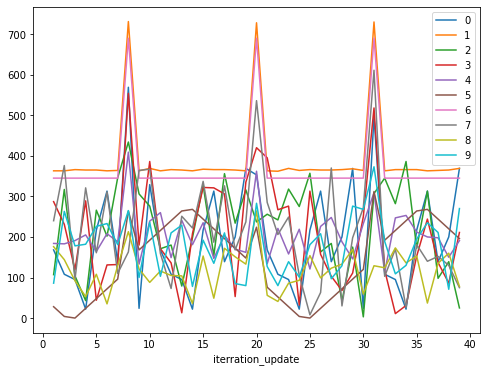

In [52]:
fig, ax = plt.subplots(figsize=(8,6))

for i, g in df.groupby('id'):
    g.plot(x='iterration_update', y='ecart_position_avec_precedent', ax=ax, label=str(i))

plt.show()

# Fonction Typage

Les tortues fatiguées s’endorment au fur et à mesure qu’elles avancent. Leur vitesse diminue à un rythme constant jusqu’à tomber à 0. Ces tortues se réveillent alors et recommencent à accélérer (au même rythme qu’elles ont ralenti) jusqu’à atteindre le vitesse initiale, puis elles recommencent alors à s’endormir. Il est possible que le rythme de (décroissance) soit différent au moment de l’arrêt de la tortue et au moment où elle termine sa réaccélération à sa vitesse de départ. On prendra la convention que les tortues fatiguées et cycliques sont considérées comme fatiguées, mais pas comme cycliques. (paramètres: vitesse initiale et rythme de (dé)croissance)

In [48]:
def detectMissTopVitesse(cpt, array_miss_top):
    for i in array_miss_top :
        if cpt == (i - 1) - 1 :
            return True
    return False
        
        
        
def detectMissTopAcceleration(cpt, array_miss_top):
    for i in array_miss_top :
        if cpt == (i - 1) - 2 :
            return True
    return False
        
        

In [49]:
# Detection des tortues régulières
def detect_regular(df_join,id) :
    # On procede pareil que dans la fonction detect_tired ici sauf que on verifie 
    # que le coefficient d'acceleration le plus frequent 0 est présent partout
    # Ici il faut prendre en consideration les possibles "ratage" de top.
    # On verifie que chaque valeur d'acceleration des tortues est égale à 0 et 
    # il faut verifier si entre deux times series qui ont une accelerations nulle
    # on a une time serie avec un point "abérrant" (outlier) qui se traduit par un "ratage" de top
    # qu'il ne faut pas prendre en consideration
    array = np.array(df_join['acceleration'][id])
    print(array)
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    index = np.argmax(freq_array)
    value = unique_elements[index]
    print(value)
    # Si la valeur la plus fréquente est  0 alors c'est potentiellement une tortue réguliere
    if value == 0 :
         
        cpt = 0
        print(array_abs)
        for e in array_abs :
            # Si on rate le top entre deux requêtes on prends pas l'acceleration de cette time serie en consideration
            # Donc on verifie si ya un "ratage" de top
            #print(str(array_abs[cpt])+" et "+ str(array_abs[cpt+1]))
            if e != 0 :
                if array_abs[cpt] == array_abs[cpt-1] or array_abs[cpt] == array_abs[cpt+1] :
                    cpt += 1
                    continue
                # Sinon ce n'est pas une tortue réguliere
                else:
                    return False
            # Sinon on verifie que l'acceleration est égale a zero
            elif e == 0 :
                index_vitesse = cpt
                cpt += 1
                continue
            
        return True,np.array(df_join['ecart_position_avec_precedent'][id])[index_vitesse]
    else :
        return False

In [54]:
def detect_cycle(df_join,id, array_miss_top):
    check_acceleration = np.array(df_join['acceleration'][id])
    freq_array = []
    unique_elements, counts_elements = np.unique(check_acceleration, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    for freq in value_count[1] :
        freq_array.append(freq / len(check_acceleration))
    max_freq = np.array(freq_array).max()
    index = np.argmax(freq_array)
    value = unique_elements[index]
    
    # On regarde si la tortue est réguliere avant de betement commencer à chercher un cycle
    if value == 0 :
        return False

    array = np.array(df_join['ecart_position_avec_precedent'][id])
    potential_cycle = False
    test_cycle = False
    visited = []
    current_cycle = []
    cycle = []
    count_cycle = 0
    cpt_current_cycle = 0
    cpt_current_element = 0
    cpt_miss_top = 0
    len_cycle = 0
    index_tab_vitesse_initial = 0
    for e in array :
        # Premier cas on append simplement :
        if cpt_current_element == 0 :
            cpt_current_cycle += 1
            current_cycle.append(e)
            visited.append(e)
            cpt_current_element += 1
        
        else :
            # Si on a pas de cycle potentiel et qu'on detect un ratage de top, on reset le cycle
            
            if cpt_miss_top > 0 :
                cpt_miss_top -= 1
                
            
            elif detectMissTopVitesse(cpt_current_element,array_miss_top) and potential_cycle == False :
                print('if 1')
                #print(cpt_current_element)
                cpt_current_cycle = 0
                index_tab_vitesse_initial = cpt_current_element
                current_cycle = []
                cpt_miss_top += 2
                
            
            # Si on a pas encore de cycle potentiel et qu'on retombe sur le premier element du cycle courant
            # Alors on on a un cycle potentiel
            elif len(current_cycle) > 0 and e == current_cycle[0] and potential_cycle == False and len(current_cycle) > 1 and e != current_cycle[cpt_current_cycle-1] :
                print('if 2')
                potential_cycle = True
                visited.append(e)
                cpt_current_element + 1
                len_cycle = cpt_current_cycle
                cycle = current_cycle
                print('cycle potentiel:'+str(cycle))
                print("longueur: " + str(len_cycle))
                #print(visited)
            
            # Si on a pas de cycle potentiel, il faut comparer la fin des elements du tableau avec
            # le cycle potentiel constitué. Il faut adapter un compteur pour les indices du cycles potentiels
            elif potential_cycle == True :
                
                if cpt_current_cycle == len_cycle and test_cycle == False :
                    cpt_current_cycle = 1 
                    test_cycle = True
                elif cpt_current_cycle == len_cycle and test_cycle == True : 
                    cpt_current_cycle = 0
                    current_cycle = []
                elif cpt_current_cycle > len_cycle : 
                    cpt_current_cycle -= len_cycle
                
                #print(str(cycle[cpt_current_cycle]) + ' et element acceleration '+str(e))
                if detectMissTopVitesse(cpt_current_element,array_miss_top):
                    
                    cpt_current_cycle += 2
                    
                elif cycle[cpt_current_cycle] == e :
                    #print('suis le cycle')
                    cpt_current_cycle += 1
                else :
                    return False

            else :
                cpt_current_cycle += 1
                current_cycle.append(e)
                visited.append(e)
            print(current_cycle)
            cpt_current_element += 1
        #print(cpt_current_element)
    if test_cycle == True :
        return True,df_join['ecart_position_avec_precedent'][id][index_tab_vitesse_initial:index_tab_vitesse_initial+len_cycle]
    else :
        return False

In [51]:
detect_cycle(df_join,0,listMissTop)

[168.0, 108.0]
[168.0, 108.0, 95.0]
[168.0, 108.0, 95.0, 22.0]
[168.0, 108.0, 95.0, 22.0, 217.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0]
if 1
[]
[]
[]
[168.0]
[168.0, 108.0]
[168.0, 108.0, 95.0]
[168.0, 108.0, 95.0, 22.0]
[168.0, 108.0, 95.0, 22.0, 217.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0, 200.0]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0, 200.0, 369.0]
if 1
[]
[]
[]
[95.0]
[95.0, 22.0]
[95.0, 22.0, 217.0]
[95.0, 22.0, 217.0, 313.0]
[95.0, 22.0, 217.0, 313.0, 139.0]
[95.0, 22.0, 217.0, 313.0, 139.0, 200.0]
[95.0, 22.0, 217.0, 313.0, 139.0, 200.0, 369.0]
[95.0, 22.0, 217.0, 313.0, 139.0, 200.0, 369.0, 24.0]
if 1
[]
[]
[]
[22.0]
[22.0, 217.0]
[22.0, 217.0, 313.0]
[22.0, 217.0, 313.0, 139.0]
[22.0, 217.0, 313.0, 139.0, 200.0]
[22.0, 217.0, 313.0, 139.0, 200.0, 369.0]


False

In [46]:
df_join['ecart_position_avec_precedent'][0]

[168.0,
 108.0,
 95.0,
 22.0,
 217.0,
 313.0,
 139.0,
 569.0,
 24.0,
 329.0,
 168.0,
 108.0,
 95.0,
 22.0,
 217.0,
 313.0,
 139.0,
 200.0,
 369.0,
 353.0,
 168.0,
 108.0,
 95.0,
 22.0,
 217.0,
 313.0,
 139.0,
 200.0,
 369.0,
 24.0,
 497.0,
 108.0,
 95.0,
 22.0,
 217.0,
 313.0,
 139.0,
 200.0,
 369.0]

In [21]:
listMissTop

[9, 21, 32]

In [23]:
import heapq

# Detection des tortues endormies
def detect_tired(df_join,id,array_miss_top):
    array = np.array(df_join['acceleration'][id])
    # On converti les valeurs d'acceleration en valeur absolu pour les conditionner aux regles de rythmes des tortues
    # Par rapport aux valeurs de cycles attendus pour l'acceleration
    n = len(array)
    freq_array = []
    array_abs = np.absolute(array)
    unique_elements, counts_elements = np.unique(array_abs, return_counts=True)
    value_count = np.asarray((unique_elements, counts_elements))
    # On recupere les frequences pour toutes les accelerations 
    for freq in value_count[1] :
        freq_array.append(freq / n)
    max_freq = np.array(freq_array).max()
    # On regarde quelle est l'acceleration la plus significative en terme de ratio et on l'a stocke dans value
    index = np.argmax(freq_array)
    second_index = np.array(freq_array).argsort()[-2]
    # Sauvegarde de la vitesse initiale
    #print(second_index)
    acceleration_initiale = unique_elements[second_index]
    #print(df['ecart_position_avec_precedent'][id])
    index_vitesse_initiale = (list(array_abs).index(acceleration_initiale))
    vitesse_initiale = np.array(df['ecart_position_avec_precedent'][id])[index_vitesse_initiale]
    cpt_miss = 0
    value = unique_elements[index]
    #print(value)
    # Si la tortue n'est pas reguliere alors c'est potentiellement une tortue endormie
    if value != 0: 
        cpt = 0
        # on regarde que les times series enregistrés vérifient les conditions des tortues endormies
        for e in array_abs :
            # Si notre premiere valeur est un miss ou un ajustement
            print(str(e)+" et "+str(value))
            
            if detectMissTopAcceleration(cpt,array_miss_top) : 
                cpt_miss = 1
                cpt += 1
                print('miss detected')
            
            elif cpt_miss > 0 :
                cpt_miss -= 1
                cpt +=1
            
            elif e != value and cpt == 0 :
                if array_abs[cpt+1] == value:
                    cpt += 1
                    continue
                
            # Si on tombe tout le temps sur le coefficient d'acceleration enregistré comme le plus frequente on continue
            elif e == value :
                cpt += 1
                continue
            
            # Si ce n'est pas la premiere valeur et que la valeur absolue de la valeur d'acceleration au top avant (n-1)
            # Est égale a la valeur absolue de la valeur d'acceleration au top apres (n+1)
            # Alors c'est un ratage de top et donc ce n'est pas a prendre en consideration
            # Le top courant
            elif cpt > 0 and e != value :
                
                
                #S'il ya ratage de top, on verifie avec les valeurs d'avant et d'apres
                if array_abs[cpt-1] == value or array_abs[cpt-3] == value:
                    
                    #print('ratage de top')
                    cpt += 1
                    continue
                
                   
                
                else :
                    return False
            
            # Sinon ce n'est pas une tortue endormie
            else :
                return False
        # l'ensemble des accelerations enregistrés respectent les conditions d'accelerations des tortues endormies
        return True,vitesse_initiale
    else :
        # Sinon c'est pas une tortue endormie
        return False


In [24]:
listMissTop

[9, 21, 32]

In [25]:
def detect_distraite(df,id) :
    if df['endormie'][id] == False :
        if df['regulier'][id] == False :
            if df['cyclique'][id] == False :
                min_vitesse = np.array(df['ecart_position_avec_precedent'][id]).min()
                max_vitesse = np.array(df['ecart_position_avec_precedent'][id]).max()
                
                return True,min_vitesse,max_vitesse
    return False


In [26]:
listMissTop

[9, 21, 32]

# Detection des tortues

In [27]:
df_join = df_join.reset_index()

In [28]:
def analyse_detection(df_join):
    array_id = df_join['id'].unique()
    for i in array_id :
        df_join['endormie'][i] = detect_tired(df_join, i,listMissTop)
        df_join['regulier'][i] = detect_regular(df_join, i)
        df_join['cyclique'][i] = detect_cycle(df_join,i,listMissTop)
        df_join['distraite'][i] = detect_distraite(df_join,i)
    return df_join

In [29]:
df_resultat = analyse_detection(df_join)

60.0 et 13.0
13.0 et 13.0
73.0 et 13.0
195.0 et 13.0
[ -60.  -13.  -73.  195.   96. -174.  430. -545.  305. -161.  -60.  -13.
  -73.  195.   96. -174.   61.  169.  -16. -185.  -60.  -13.  -73.  195.
   96. -174.   61.  169. -345.  473. -389.  -13.  -73.  195.   96. -174.
   61.  169.]
13.0
-174.0
[9, 21, 32]
[168.0, 108.0]
[9, 21, 32]
[168.0, 108.0, 95.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0]
[9, 21, 32]
if 1
[]
[]
[]
[9, 21, 32]
[168.0]
[9, 21, 32]
[168.0, 108.0]
[9, 21, 32]
[168.0, 108.0, 95.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0, 200.0]
[9, 21, 32]
[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0, 200.0, 369.0]

<ipython-input-28-011143fafc50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['endormie'][i] = detect_tired(df_join, i,listMissTop)
<ipython-input-28-011143fafc50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['regulier'][i] = detect_regular(df_join, i)
<ipython-input-28-011143fafc50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join['cyclique'][i] = detect_cycle(df_join,i,listMissTop)
<ipython-input-28-011

In [35]:
df_resultat

,id,top,position,iterration_update,ecart_position_avec_precedent,acceleration,distraite,endormie,cyclique,regulier
0,0,"[166403, 166404, 166405, 166406, 166407, 16640...","[30013197, 30013305, 30013400, 30013422, 30013...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[168.0, 108.0, 95.0, 22.0, 217.0, 313.0, 139.0...","[-60.0, -13.0, -73.0, 195.0, 96.0, -174.0, 430...","(True, 22.0, 569.0)",False,False,False
1,1,"[166403, 166404, 166405, 166406, 166407, 16640...","[60819627, 60819990, 60820356, 60820721, 60821...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[363.0, 363.0, 366.0, 365.0, 365.0, 363.0, 364...","[0.0, 3.0, -1.0, 0.0, -2.0, 1.0, 367.0, -368.0...","(True, 362.0, 731.0)",False,False,False
2,2,"[166403, 166404, 166405, 166406, 166407, 16640...","[33545582, 33545899, 33546003, 33546046, 33546...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[107.0, 317.0, 104.0, 43.0, 266.0, 202.0, 346....","[210.0, -213.0, -61.0, 223.0, -64.0, 144.0, 88...","(True, 3.0, 434.0)",False,False,False
3,3,"[166403, 166404, 166405, 166406, 166407, 16640...","[32160290, 32160521, 32160640, 32160929, 32160...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[287.0, 231.0, 119.0, 289.0, 44.0, 131.0, 132....","[-56.0, -112.0, 170.0, -245.0, 87.0, 1.0, 422....","(True, 11.0, 554.0)",False,False,False
4,4,"[166403, 166404, 166405, 166406, 166407, 16640...","[30981674, 30981857, 30982048, 30982253, 30982...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[184.0, 183.0, 191.0, 205.0, 164.0, 208.0, 188...","[-1.0, 8.0, 14.0, -41.0, 44.0, -20.0, 221.0, -...","(True, 113.0, 409.0)",False,False,False
5,5,"[166403, 166404, 166405, 166406, 166407, 16640...","[22298156, 22298160, 22298160, 22298184, 22298...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[28.0, 4.0, 0.0, 24.0, 48.0, 72.0, 96.0, 264.0...","[-24.0, -4.0, 24.0, 24.0, 24.0, 24.0, 168.0, -...",False,"(True, 28.0)",False,False
6,6,"[166403, 166404, 166405, 166406, 166407, 16640...","[57409035, 57409380, 57409725, 57410070, 57410...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[345.0, 345.0, 345.0, 345.0, 345.0, 345.0, 345...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 345.0, -345.0, ...",False,False,False,"(True, 345.0)"
7,7,"[166403, 166404, 166405, 166406, 166407, 16640...","[32329879, 32330255, 32330350, 32330671, 32330...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[240.0, 376.0, 95.0, 321.0, 161.0, 311.0, 110....","[136.0, -281.0, 226.0, -160.0, 150.0, -201.0, ...","(True, 8.0, 611.0)",False,False,False
8,8,"[166403, 166404, 166405, 166406, 166407, 16640...","[17456283, 17456427, 17456519, 17456572, 17456...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[176.0, 144.0, 92.0, 53.0, 108.0, 35.0, 129.0,...","[-32.0, -52.0, -39.0, 55.0, -73.0, 94.0, 84.0,...","(True, 35.0, 264.0)",False,False,False
9,9,"[166403, 166404, 166405, 166406, 166407, 16640...","[29833264, 29833527, 29833705, 29833887, 29834...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[86.0, 263.0, 178.0, 182.0, 226.0, 233.0, 181....","[177.0, -85.0, 4.0, 44.0, 7.0, -52.0, 84.0, -1...","(True, 71.0, 373.0)",False,False,False


In [34]:
df_resultat.to_csv("resultat.csv", sep='\t', encoding='utf-8')